<a href="https://colab.research.google.com/github/tguerreroco/03MAIR---Algoritmos-de-Optimizacion---2019/blob/master/07MAIR_Actividad_1_TGC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 1: Deep Vision

En esta actividad, el alumno debe evaluar y comparar dos estrategias para la clasificación de imágenes en el dataset Caltech 101. El dataset ha sido preprocesado y guardado utilizando pickle (más información sobre el preprocesado se puede obtener en el notebook "preprocesado_caltech101" https://drive.google.com/open?id=1ioVl25t1p3mE2lTUFTwwOFi3fHFgUvtb).

Las instrucciones de cómo obtener el dataset aparecen al inicio de este notebook.

### Estrategia 1: Red pre-entrenada

La primera estrategia a comparar debe incluir la utilización de una red preentrenada con el dataset ImageNet, pero en la que la capa densa (el clasificador) debe entrenarse para clasificar los objetos de Caltech 101. Deben compararse al menos dos tipos de arquitecturas (VGG16, VGG19, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, RasNet) y se debe seleccionar la que mayor precisión nos dé (información sobre las arquitecturas disponibles en https://keras.io/applications/)

### Estrategia 2: Entrenar desde cero

La segunda estrategia a comparar será una red neuronal profunda que el alumno debe diseñar, entrenar y optimizar. Se debe justificar empíricamente las decisiones que llevaron a la selección de atributos, capas y parámetros a los que se ha llegado. Se espera que el alumno utilice todas las técnicas de optimización mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal.

## Normas a seguir

- Se debe entregar un notebook que incluya las instrucciones presentes
- El notebook, junto a cualquier archivo necesario, __deberá entregarse como un link compartido__ en una carpeta gdrive
- Aunque los alumnos pueden trabajar en sus propios ordenadores, __la entrega deberá hacerse como un notebook en google colaboratory__, de forma que el profesor pueda abrir y ejectutar el código desde Google Colab sin necesitar alteraciones (salvo el cambio de BASE_FOLDER)
- Las __redes utilizadas deben estar entrenadas y ser cargadas__ desde un archivo. La entrega de una red sin entrenar supondrá perdidad de puntos.
- Si se desea __evidenciar alguna métrica__ del proceso de entrenamiento (precisión, pérdida, etc), estas deben ser generadas y guardadas, y __mostradas en el notebook final solo como imagen__.
- Todos los archivos que deban adjuntarse a la actividad __deberán incluirse en la carpeta gdrive compartida__, y el notebook debe hacer referencias parciales a los mismos.
- Tanto __la carga de archivos como guardar datos a archivos__ deberán siempre __contener referencias parciales__ con respecto a un directorio base (__BASE_FOLDER__).  En este notebook se incluye un ejemplo de cómo cargar datos utilizando un directorio base.



## Criterio de evaluación

- Seguimiento de las normas establecidas en la actividad
- Efectividad al presentar las comparaciones entre métricas de evaluación de ambos modelos
- Demostración de la utilización de técnicas de optimización para mejorar el rendimiento de los modelos.
- Corrección en el uso de algoritmos, modelos y formas idiomáticas en Python.
- Se deberá incluir mediante un link de acceso público, tanto el notebook como cualquier archivo que se utilice en el mismo. En el notebook se deberán cargar los modelos a través de estos archivos.
- El código debe poder ejecutarse sin modificación alguna (salvo el cambio de BASE_DIRECTORY) en Google Colaboratory.

### Obtención del dataset preprocesado Caltech 101

A partir de Caltech 101 dataset 
- original en http://www.vision.caltech.edu/Image_Datasets/Caltech101/#Download
- preprocesado subido al gdrive https://drive.google.com/open?id=1ziDd-Au-Fn8XneBeDQya9MjPBoTpDqqK

In [1]:
###################################################################################################
# La utilizacion de un directorio base es obligatoria
# Todas las referencias al disco duro (guardar o cargar) deberan tener esta variable como base
###################################################################################################
BASE_FOLDER = '/content/drive/My Drive/Master IA/Modulo 6 RN y DP/'
###################################################################################################

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tarfile
import pickle
%matplotlib inline

In [0]:
###################################################################################################
# Ejemplo de como cargar de archivos con referencia al directorio base
###################################################################################################

# DESCARGAR Y DESCOMPRIMIR EL DATASET CALTECH_PREPROCESADO DEL GDRIVE
# Cargar las ndarrays
# Los archivos del dataset caltech se descomprimieron y se colocaron en la carpeta CALTECH_folder de GDrive
CALTECH_folder='caltech101_dataset/'
with open(BASE_FOLDER+CALTECH_folder+"pickle_all_images_df.pickle", "rb") as input_file:
    x_datos = pickle.load(input_file)
with open(BASE_FOLDER+CALTECH_folder+"pickle_all_classes.pickle", "rb") as input_file:
    y_datos = pickle.load(input_file)


In [4]:
print(x_datos.shape)
print(len(y_datos))

(9145, 128, 128, 3)
9145


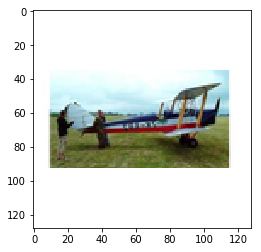

airplanes


In [5]:
# show image
ELEMENT=100#9144
imgplot = plt.imshow(x_datos[ELEMENT])
plt.show()
print(y_datos[ELEMENT])

In [6]:
# Transformando las labels de texto a valores numéricos
y = np.unique(y_datos)
mapping = { key : value for key,value in zip(y,range(len(y)))}
processed_y = np.array([mapping[i] for i in y_datos])
#print(y)
x_etiquetas=processed_y
print(mapping)
print(x_etiquetas)
print("clases")
print(len(y))
number_of_classes=len(y)


{'BACKGROUND_Google': 0, 'Faces': 1, 'Faces_easy': 2, 'Leopards': 3, 'Motorbikes': 4, 'accordion': 5, 'airplanes': 6, 'anchor': 7, 'ant': 8, 'barrel': 9, 'bass': 10, 'beaver': 11, 'binocular': 12, 'bonsai': 13, 'brain': 14, 'brontosaurus': 15, 'buddha': 16, 'butterfly': 17, 'camera': 18, 'cannon': 19, 'car_side': 20, 'ceiling_fan': 21, 'cellphone': 22, 'chair': 23, 'chandelier': 24, 'cougar_body': 25, 'cougar_face': 26, 'crab': 27, 'crayfish': 28, 'crocodile': 29, 'crocodile_head': 30, 'cup': 31, 'dalmatian': 32, 'dollar_bill': 33, 'dolphin': 34, 'dragonfly': 35, 'electric_guitar': 36, 'elephant': 37, 'emu': 38, 'euphonium': 39, 'ewer': 40, 'ferry': 41, 'flamingo': 42, 'flamingo_head': 43, 'garfield': 44, 'gerenuk': 45, 'gramophone': 46, 'grand_piano': 47, 'hawksbill': 48, 'headphone': 49, 'hedgehog': 50, 'helicopter': 51, 'ibis': 52, 'inline_skate': 53, 'joshua_tree': 54, 'kangaroo': 55, 'ketch': 56, 'lamp': 57, 'laptop': 58, 'llama': 59, 'lobster': 60, 'lotus': 61, 'mandolin': 62, 'm

In [0]:
#Generando conjuntos de entrenamiento y prueba
train_data=x_datos[4000:9090]
test_data =x_datos[7096:9144]
train_labels=x_etiquetas[4000:9090]
test_labels=x_etiquetas[7096:9144]

In [8]:
from keras.utils import to_categorical
# transformacion de los datos
#x_train=train_data.reshape(128,128,3)
x_train=train_data
x_train = x_train.astype('float32')/255
#x_test=test_data.reshape(128,128,3)
x_test=test_data
x_test = x_test.astype('float32')/255
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
#y_train=train_labels
#y_test=test_labels
print(test_labels.shape)
print(len(x_train))
print(x_train.shape)
print(len(y_train))
print(y_train.shape)
print(len(x_test))
print(x_test.shape)
print(len(y_test))
print(y_test.shape)
print(y_train)
print(y_test)

Using TensorFlow backend.


(2048,)
5090
(5090, 128, 128, 3)
5090
(5090, 102)
2048
(2048, 128, 128, 3)
2048
(2048, 102)
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


<b>Estrategia 1: Red pre-entrenada</b><br>
  Red entrenada en ImageNet: animales, objetos, etc. 1.4 millones<br>
Utilizar la parte convolucional de una red entrenada en gran dataset<br>
genérica
  

In [18]:
#keras incluye varias arquitecturas
# VGG16, VGG19, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, RasNet
# documentacion https://keras.io/applications/
# Visual Geometry Group 16 / 19 (numero de layers)
# 1 y 2 en la competicion ImageNet 2014
# kernels pequenyos de 3x3
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False, # incluir la parte densa (fully connected)
                 input_shape=(128,128,3))
conv_base.summary()

58892288/58889256 [==============================] - 7s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool

In [28]:
# conectarlo a nueva parte densa
from keras import models
from keras import layers
from keras.layers import Conv2D, MaxPooling2D

conv_base.trainable = False # evitar que los pesos se modifiquen en la parte convolucional
pre_trained_model_vgg16 = models.Sequential()
pre_trained_model_vgg16.add(conv_base)
pre_trained_model_vgg16.add(layers.Flatten())
red_conv_inicial.add(layers.Dropout(0.25))
pre_trained_model_vgg16.add(layers.Dense(512, activation='relu'))
pre_trained_model_vgg16.add(layers.Dense(number_of_classes, activation='softmax'))

pre_trained_model_vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_8 (Dense)              (None, 102)               52326     
Total params: 18,961,830
Trainable params: 4,247,142
Non-trainable params: 14,714,688
_________________________________________________________________


In [29]:
print(number_of_classes)
print(y_train.shape)
print(y_test.shape)

102
(5090, 102)
(2048, 102)


In [0]:
# compilar el modelo
pre_trained_model_vgg16.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [31]:
history_vgg16 = pre_trained_model_vgg16.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test))

Train on 5090 samples, validate on 2048 samples
Epoch 1/20
5090/5090 [==============================] - 12s 2ms/step - loss: 4.0932 - acc: 0.1356 - val_loss: 4.4904 - val_acc: 0.0000e+00
Epoch 2/20
5090/5090 [==============================] - 11s 2ms/step - loss: 3.8057 - acc: 0.1552 - val_loss: 4.4491 - val_acc: 0.0000e+00
Epoch 3/20
5090/5090 [==============================] - 11s 2ms/step - loss: 3.7934 - acc: 0.1568 - val_loss: 4.4012 - val_acc: 0.0000e+00
Epoch 4/20
5090/5090 [==============================] - 11s 2ms/step - loss: 3.7838 - acc: 0.1568 - val_loss: 4.4295 - val_acc: 0.0000e+00
Epoch 5/20
5090/5090 [==============================] - 11s 2ms/step - loss: 3.7847 - acc: 0.1568 - val_loss: 4.4212 - val_acc: 0.0000e+00
Epoch 6/20
5090/5090 [==============================] - 11s 2ms/step - loss: 3.7836 - acc: 0.1568 - val_loss: 4.3840 - val_acc: 0.0000e+00
Epoch 7/20
5090/5090 [==============================] - 11s 2ms/step - loss: 3.7790 - acc: 0.1568 - val_loss: 4.5392 -

In [0]:
loss,accuracy = pre_trained_model_vgg16.evaluate(x_test,y_test)
print('loss {} accuracy {}'.format(loss,accuracy))

2048/2048 [==============================] - 5s 2ms/step
loss 4.731424812227488 accuracy 0.0


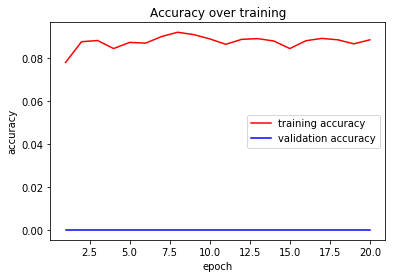

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#plot accuracy
epochs = np.arange(1,len(history_vgg16.history['acc'])+1)
plt.title('Accuracy over training')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epochs,history_vgg16.history['acc'],'r',label='training accuracy')
plt.plot(epochs,history_vgg16.history['val_acc'],'b',label='validation accuracy')
plt.legend(loc='best')
plt.show()

In [0]:
#keras incluye varias arquitecturas
# VGG16, VGG19, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, RasNet
# documentacion https://keras.io/applications/
# Visual Geometry Group 16 / 19 (numero de layers)
# 1 y 2 en la competicion ImageNet 2014
# kernels pequenyos de 3x3
from keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                 include_top=False, # incluir la parte densa (fully connected)
                 input_shape=(128,128,3))
conv_base.summary()

80142336/80134624 [==============================] - 23s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_poo

In [0]:
# conectarlo a nueva parte densa
from keras import models
from keras import layers
from keras.layers import Conv2D, MaxPooling2D

conv_base.trainable = False # evitar que los pesos se modifiquen en la parte convolucional
pre_trained_model_vgg19 = models.Sequential()
pre_trained_model_vgg19.add(conv_base)
pre_trained_model_vgg19.add(layers.Flatten())
pre_trained_model_vgg19.add(layers.Dense(512, activation='relu'))
pre_trained_model_vgg19.add(layers.Dense(number_of_classes, activation='softmax'))

pre_trained_model_vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_6 (Dense)              (None, 102)               52326     
Total params: 24,271,526
Trainable params: 4,247,142
Non-trainable params: 20,024,384
_________________________________________________________________


In [0]:
# compilar el modelo
pre_trained_model_vgg19.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [0]:
history_vgg19 = pre_trained_model_vgg19.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test))

Train on 9090 samples, validate on 2048 samples
Epoch 1/20
9090/9090 [==============================] - 21s 2ms/step - loss: 4.1797 - acc: 0.0881 - val_loss: 4.7063 - val_acc: 0.0000e+00
Epoch 2/20
9090/9090 [==============================] - 21s 2ms/step - loss: 4.1814 - acc: 0.0897 - val_loss: 5.2376 - val_acc: 0.0000e+00
Epoch 3/20
9090/9090 [==============================] - 21s 2ms/step - loss: 4.1732 - acc: 0.0869 - val_loss: 4.6717 - val_acc: 0.0000e+00
Epoch 4/20
9090/9090 [==============================] - 21s 2ms/step - loss: 4.1893 - acc: 0.0871 - val_loss: 5.2306 - val_acc: 0.0000e+00
Epoch 5/20
9090/9090 [==============================] - 21s 2ms/step - loss: 4.1729 - acc: 0.0886 - val_loss: 4.7936 - val_acc: 0.0000e+00
Epoch 6/20
9090/9090 [==============================] - 21s 2ms/step - loss: 4.1707 - acc: 0.0861 - val_loss: 4.9446 - val_acc: 0.0000e+00
Epoch 7/20
9090/9090 [==============================] - 21s 2ms/step - loss: 4.1700 - acc: 0.0858 - val_loss: 4.7691 -

In [0]:
loss,accuracy = pre_trained_model_vgg19.evaluate(x_test,y_test)
print('loss {} accuracy {}'.format(loss,accuracy))

2048/2048 [==============================] - 4s 2ms/step
loss 5.446199957281351 accuracy 0.0


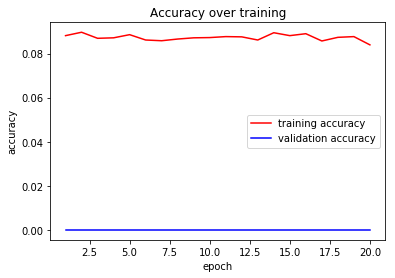

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#plot accuracy
epochs = np.arange(1,len(history_vgg19.history['acc'])+1)
plt.title('Accuracy over training')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epochs,history_vgg19.history['acc'],'r',label='training accuracy')
plt.plot(epochs,history_vgg19.history['val_acc'],'b',label='validation accuracy')
plt.legend(loc='best')
plt.show()

In [0]:
# entrenar utilizando el generador de data
datagen.fit(x_train)

# es necesario especificar el numero de steps cuando se usa un generator (para saber cuando dejar de generar datos en una epoca)
batch_size = 32
num_samples = x_train.shape[0] * 10

# Fit the model on the batches generated by datagen.flow().
history_pretrained = pre_trained_model_vgg16.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                            epochs=20,
                            validation_data=(x_test, y_test),
                            workers=4,
                            steps_per_epoch=num_samples//batch_size)# entrenar utilizando el generador de data
datagen.fit(x_train)

# es necesario especificar el numero de steps cuando se usa un generator (para saber cuando dejar de generar datos en una epoca)
batch_size = 32
num_samples = x_train.shape[0] * 10

# Fit the model on the batches generated by datagen.flow().
history_pretrained = pre_trained_model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                            epochs=20,
                            validation_data=(x_test, y_test),
                            workers=4,
                            steps_per_epoch=num_samples//batch_size)

ValueError: ignored

### Estrategia 2: Entrenar desde cero

In [9]:
from keras import models
from keras import layers

red_conv_inicial = models.Sequential()
red_conv_inicial.add(layers.Conv2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
red_conv_inicial.add(layers.Conv2D(32,(3,3),activation='relu'))
red_conv_inicial.add(layers.MaxPooling2D((2,2)))
red_conv_inicial.add(layers.Dropout(0.25))
red_conv_inicial.add(layers.Conv2D(64,(3,3),activation='relu'))
red_conv_inicial.add(layers.Conv2D(64,(3,3),activation='relu'))
red_conv_inicial.add(layers.MaxPooling2D((2,2)))
red_conv_inicial.add(layers.Flatten())
red_conv_inicial.add(layers.Dropout(0.25))
red_conv_inicial.add(layers.Dense(512,activation='relu'))
#red_conv_inicial.add(layers.Dropout(0.5)) #Este parametro no permite aprender
red_conv_inicial.add(layers.Dense(number_of_classes,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
red_conv_inicial.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 58, 58, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 64)        0         
__________

In [0]:
# compilar el modelo
red_conv_inicial.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [12]:
nueva_red = red_conv_inicial.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 5090 samples, validate on 2048 samples
Epoch 1/20
5090/5090 [==============================] - 15s 3ms/step - loss: 3.9227 - acc: 0.1473 - val_loss: 4.8289 - val_acc: 0.0000e+00
Epoch 2/20
5090/5090 [==============================] - 8s 2ms/step - loss: 3.7981 - acc: 0.1568 - val_loss: 4.4288 - val_acc: 0.0000e+00
Epoch 3/20
5090/5090 [==============================] - 8s 2ms/step - loss: 3.7522 - acc: 0.1658 - val_loss: 4.9114 - val_acc: 0.0000e+00
Epoch 4/20
5090/5090 [==============================] - 8s 2ms/step - loss: 3.0949 - acc: 0.2896 - val_loss: 3.7462 - val_acc: 0.1050
Epoch 5/20
5090/5090 [==============================] - 8s 2ms/step - loss: 2.6569 - acc: 0.3735 - val_loss: 3.3803 - val_acc: 0.2002
Epoch 6/20
5090/5090 [==============================] - 8s 2ms/step - loss: 2.3916 - acc: 0.4253 - val_loss: 2.9867 - val_acc: 0.2983
Epoch 7/20
5090/5090 [==============================] - 8s 2ms/step - loss: 2.1609 - ac

In [13]:
loss,accuracy = red_conv_inicial.evaluate(x_test,y_test)
print('loss {} accuracy {}'.format(loss,accuracy))

2048/2048 [==============================] - 1s 566us/step
loss 0.3216954290535341 accuracy 0.9677734375


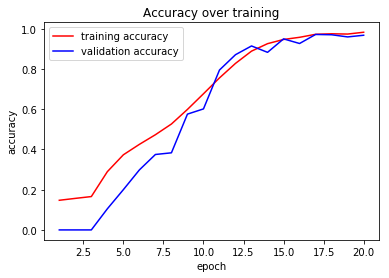

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#plot accuracy
epochs = np.arange(1,len(nueva_red.history['acc'])+1)
plt.title('Accuracy over training')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epochs,nueva_red.history['acc'],'r',label='training accuracy')
plt.plot(epochs,nueva_red.history['val_acc'],'b',label='validation accuracy')
plt.legend(loc='best')
plt.show()

Data augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10, # grados de rotacion aleatoria
    width_shift_range=0.1, # fraccion del total (1) para mover la imagen
    height_shift_range=0.1, # fraccion del total (1) para mover la imagen
    shear_range=0, # deslizamiento
    zoom_range=0.1, # rango de zoom
    horizontal_flip=True, # girar las imagenes horizontalmente (eje vertical)
    fill_mode='nearest', # como rellenar posibles nuevos pixeles
    channel_shift_range=0.2 # cambios aleatorios en los canales de la imagen
)

In [16]:
# entrenar utilizando el generador de data
datagen.fit(x_train)

# es necesario especificar el numero de steps cuando se usa un generator (para saber cuando dejar de generar datos en una epoca)
batch_size = 32
num_samples = x_train.shape[0] * 10

# Fit the model on the batches generated by datagen.flow().
history_nueva_red = red_conv_inicial.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                            epochs=20,
                            validation_data=(x_test, y_test),
                            workers=4,
                            steps_per_epoch=num_samples//batch_size)

Epoch 1/20
1590/1590 [==============================] - 163s 102ms/step - loss: 3.8025 - acc: 0.1535 - val_loss: 4.4043 - val_acc: 0.0000e+00
Epoch 2/20
1590/1590 [==============================] - 162s 102ms/step - loss: 3.7590 - acc: 0.1568 - val_loss: 4.4001 - val_acc: 0.0000e+00
Epoch 3/20
1590/1590 [==============================] - 162s 102ms/step - loss: 3.7573 - acc: 0.1569 - val_loss: 4.4583 - val_acc: 0.0000e+00
Epoch 4/20
1590/1590 [==============================] - 161s 101ms/step - loss: 3.7567 - acc: 0.1568 - val_loss: 4.4499 - val_acc: 0.0000e+00
Epoch 5/20
1590/1590 [==============================] - 161s 101ms/step - loss: 3.7534 - acc: 0.1578 - val_loss: 4.4301 - val_acc: 0.0000e+00
Epoch 6/20
1590/1590 [==============================] - 162s 102ms/step - loss: 3.7561 - acc: 0.1568 - val_loss: 4.4415 - val_acc: 0.0000e+00
Epoch 7/20
1590/1590 [==============================] - 161s 102ms/step - loss: 3.7544 - acc: 0.1571 - val_loss: 4.4348 - val_acc: 0.0000e+00
Epoch 

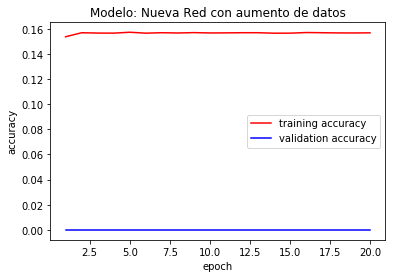

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#plot accuracy
epochs = np.arange(1,len(history_nueva_red.history['acc'])+1)
plt.title('Modelo: Nueva Red con aumento de datos')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epochs,history_nueva_red.history['acc'],'r',label='training accuracy')
plt.plot(epochs,history_nueva_red.history['val_acc'],'b',label='validation accuracy')
plt.legend(loc='best')
plt.show()